# Statistical Analysis and Hypothesis Testing

## Decision Making Using P and Critical Values for Hypothesis Testing

1. Define the statement of the hypothesis (dependent and independent aspects)
2. Create the Null and Alternative Hypotheses
3. If not mentioned, define the level of significance (critival value) 1% or 5% (95%, 99% depending on limit or threshold for accuracy)
4. Choose the type of test to perform as per the sample data (size, relationship, etc.)
  - t-test
  - z-test
  - chi-square test
  - ANOVA test
5. Obtain the test statistic and p-value
6. Run the evaluation
  - If the p-value is **greater** than $a$, we **do not reject** the null hypothesis $H_0$ (accept)
  - If the p-value is **less** than $a$, we **reject** the null hypothesis $H_0$ (reject)

## T-Test
#### When is it used?
- When you're comparing the means of 2 groups to evaluate if they differ **A/B Testing**
- When you want to compare the impact between before and after
- When the sample size is very low <=30
- When the data follows a normal distrubution

#### Types of t-tests:
- Independent sample t-test: checks the average of 2 independent, unrelated groups
  - $H_0$ : $\mu_a$ $=$ $\mu_b$
  - $H_1$ : $\mu_a$ $\neq$ $\mu_b$
- Paried-sample t-test (relationship): checks the average of 2 samples taken from the same population. It checks if before is different than after
  - $H_0$ : $\mu_d$ $=$ 0 (d is the difference between the 2 averages - before and after)
  - $H_1$ : $\mu_d$ $\neq$ 0
- One-sample t-test: the average of a single group is different from the known average (population)
  - $H_0$ : $\mu_a$ $=$ $X$
  - $H_1$ : $\mu_a$ $\neq$ $X$


  <!-- $\mu = tan(\theta)$ -->

In [1]:
import random
import scipy.stats as sts
import numpy as np
import pandas as pd

### T-Test: Independent Sample

In [2]:
# mu is the mean and sigma is the standard deviation
a = [random.gauss(mu=50,sigma=20) for x in range(30)]
b = [random.gauss(mu=55,sigma=15) for x in range(30)]

<Axes: ylabel='Density'>

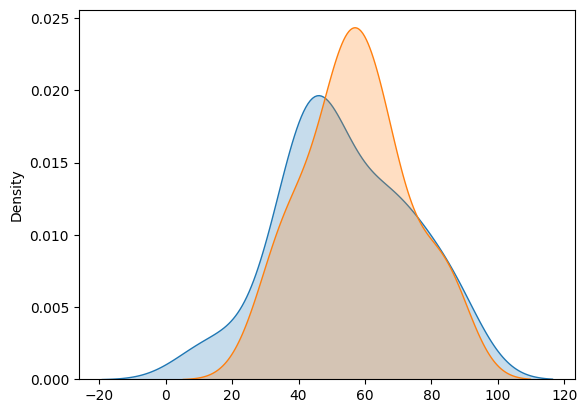

In [3]:
# Let's visualize our distributions
import seaborn as sns

sns.kdeplot(a, fill=True)
sns.kdeplot(b, fill=True)

Because a and b are independent samples and are equal to 30 in size, we can use the ind t-test

In [4]:
t_stat, p_val = sts.ttest_ind(a,b)
p_val

0.44917528030942655

Because p-value is greater than 0.05, we accept the null hypothesis, which means both distributions are almost the same

### Scenario: A/B Testing for Website Conversion Rates

Imagine you work for an e-commerce company, and your team is responsible for optimizing the company's website to increase user engagement and, ultimately, sales. The current design of the "Buy Now" button on the website is being tested against a new design to see if it leads to a higher conversion rate.

#### Methodology
- Randomly select website visitors and break them down into 2 groups
- Give group A the old website/functionality and group B the new website/functionality
- Measure engagement and usage
- Perform statistical tests to check if the new functionality/website is driving more engagement

#### Hypothesis evaluation
  - $H_0$ the new design has no significange change. Therefore, $\mu_b$ $=$ $\mu_a$
  - $H_1$ : $\mu_a$ $\neq$ $\mu_b$

In [5]:
df = pd.read_csv('./AB_Testing_Website.csv')
df.head()

,Group_A,Group_B
0,38,47
1,34,48
2,35,50
3,35,49
4,35,46


In [6]:
# Group A (OLD), Group B (NEW)
group_A = df['Group_A']
group_B = df['Group_B']

In [7]:
t_stat, p_val = sts.ttest_ind(group_A, group_B)
p_val

8.2568977246166655e-22

In [8]:
alpha = 0.05 # critical value

def stat_eval(p_val, alpha):
  if p_val < alpha:
    print('Reject the null hypothesis')
  else:
    print('Fail to reject (accept) the null hypothesis')

stat_eval(p_val, alpha)


Reject the null hypothesis


In [9]:
df['Group_B'].mean() > df['Group_A'].mean()

True

Therefore, the new functionality did improve engagement

### T-Test: Paired-sample

#### Scenario

For a particular hospital, it is advertised that a particular chemotherapy session does not affect the patient's health based on blood pressure (BP). It is to be checked if the BP before the treatement is equivalent to the BP after the treatement. Perform a statistical significance at alpha=0.05 to help validate the claim.

- $H_0$ the diff beteween the averages is 0 (diff = before vs. after)
- $H_a$ the diff between the average is not 0

We have the same population, but with a different point in time -> we use the paired (relationship) t-test
  

In [10]:
bp_df = pd.read_csv('./blood_pressure.csv')
bp_df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [11]:
bp_alpha = 0.05
bp_t_stat, bp_p_val = sts.ttest_rel(bp_df['bp_before'], bp_df['bp_after'])
bp_p_val

0.0011297914644840823

In [12]:
stat_eval(bp_p_val, bp_alpha)

Reject the null hypothesis


Because we reject the null hypothesis, there is a statistical significance that the chemotherapy changed the BP after treatment

### T-Test: One-Sample Test

#### Scenario

For a particular organization, the average age of the employees was claimed 30 years. The authorities collected a random sample of 10 employees' age data to check the claim made by organization. Construct a hypothesis at a significance of 0.05

- $H_0$ : sample mean $=$ 30
- $H_1$ : sample mean $\neq$ 30

In [13]:
df_ages = pd.read_csv('./Ages.csv')
df_ages.head()

,ages
0,34
1,45
2,65
3,78
4,32


In [14]:
ages_alpha = 0.05
ages_pop_mean = 30
ages_t_stat, ages_p_val = sts.ttest_1samp(df_ages,ages_pop_mean)

stat_eval(ages_p_val, ages_alpha)

Reject the null hypothesis


We reject the null hypothesis. The organization's claim is false based on the selected sample.

## Z-Test
#### When is it used?
- The population variance is known
- If the population variance is unknown, but the sample size is > 30

**Example**

A school principal claims that the students in his school are more intelligent than those of other schools. A random sample of 50 students' IQ score has a mean score of 110. THe mean population IQ is 100 with a Standard Deviation of 15. State whether the claim of the principal is right or not at a 5% significance level.

- $H_0$ : the avg IQ of the sample $=$ 100 (disagreeing withe the principal's statement)
- $H_1$ : the avg IQ of the sample $\neq$ 100 (not 100)

Once we statistically prove that the average IQ is different than the population, we can evaluate whether or not the avg IQ is higher or lower

- We are missing the sample data of the students we only have the average
- We can use statistical functions to generate a pseudo dataset based on the givens (mean, size, std), following a normal distribution

In [15]:
iq_alpha = 0.05

## Sample Info
mean_sample = 110
size_sample = 50

## Population Info
mean_pop = 100
std_pop = 15

$\sigma_x = \sigma / \sqrt{N}$

In [16]:
import math

std_sample = std_pop / math.sqrt(size_sample)
print('The standard deviation of the sample is: ', std_sample)

The standard deviation of the sample is:  2.1213203435596424


Next, we can generate the pseudo dataset based on mean, size, calculated sd

In [17]:
student_sample = np.random.normal(loc=mean_sample, scale=std_sample, size=size_sample)
len(student_sample)
# student_sample.size

50

In [18]:
# Have the data, now we can run z-test

from statsmodels.stats.weightstats import ztest


In [19]:
student_z_stat, student_p_value = ztest(student_sample, value = mean_sample, alternative='larger')
stat_eval(student_p_value, iq_alpha)

print(student_p_value)

Fail to reject (accept) the null hypothesis
0.6540512440584307


The principal's statement is not correct and the average IQ amongst his students does not differ from the population

## Chi-Square Test
#### When is it used?
- For categorical data
- Helps identify the relationship between 2 or more categorical attributes (dependent, independent)
- Null Hypothesis: there is NO relationship between the variables (independent)
- Alternative Hypothesis: there IS a relationship between the variables (dependent)

**Example** </br>
Let's say we collected data on the favorite car color for men and women. We want to find out whether color and gender are independent or not.

- $H_0$ : our two factors (gender, car color) are independent. There is no relationship between gender and car color.
- $H_a$ : our two factors (gender, car color) are dependent. There is a relationship between gender and car color.

In [20]:
df_shop = pd.read_csv('./Shopping.csv')

# df_shop.head()
# df_shop.sample(10)
# df_shop.value_counts('Gender')
df_shop['Car Color'].value_counts()

Car Color
Black     31
Silver    24
Pink      24
White     16
Red        9
Name: count, dtype: int64

1. Build a contingency table (crosstab)

In [21]:
# Gives me a frequency pivot table - occurrences of 2 values together
cont_table = pd.crosstab(df_shop['Gender'], df_shop['Car Color'])
cont_table

Car Color,Black,Pink,Red,Silver,White
Gender,,,,,
F,9,22,2,8,14
M,22,2,7,16,2


2. Calculate chi2 stats info (t_stat, p_val) using stats library

In [22]:
from scipy.stats import chi2_contingency

results = chi2_contingency(cont_table)
cars_p_value = results.pvalue
expected_freq = results.expected_freq
expected_freq


array([[16.39423077, 12.69230769,  4.75961538, 12.69230769,  8.46153846],
       [14.60576923, 11.30769231,  4.24038462, 11.30769231,  7.53846154]])

In [23]:
# Expected Frequency is what the contingency table should look like if there's no relationship
expected_freq

exp_frq_df = pd.DataFrame(data=expected_freq, index=['F', 'M'], columns=['Black', 'Siver', 'Red', 'White', 'Pink'])
exp_frq_df

,Black,Siver,Red,White,Pink
F,16.394231,12.692308,4.759615,12.692308,8.461538
M,14.605769,11.307692,4.240385,11.307692,7.538462


In [24]:
stat_eval(cars_p_value, 0.05)

Reject the null hypothesis


We reject the null hypothesis of the chi-square test, therefore there IS a relationship between car color and gender

## ANOVA Tests
- one-way ANOVA: deals with one single factor for multiple groups
- two-way ANOVA: two factors
- MANOVA: for multiple factors

The statistical measure for ANOVA is called `f_statistic`

Example </br>
Suppose you are a research conducting an agricultural study to compare the yield of three different fertilizer treatments (Treatment A, Treatment B, Treatment C) on a specific type of crop. You can to determin if there are significant differences in crop yields among the treatments.

- $H_0$ : the means of all treatments are equal
- $H_a$ : at least one treatment (A,B,C) has a significant mean

In [25]:
df_crop = pd.read_csv('./crop_yield_treatment.csv')
df_crop.head()

,Treatment_A,Treatment_B,Treatment_C
0,50,56,49
1,54,47,57
2,57,55,46
3,49,41,40
4,46,56,54


In [26]:
from scipy.stats import f_oneway

f_stat, crop_p_value = f_oneway(df_crop['Treatment_A'], df_crop['Treatment_B'], df_crop['Treatment_C'])

stat_eval(crop_p_value, 0.05)

Fail to reject (accept) the null hypothesis


The different treatments do not yield different outputs

## Mann-Whitney

- assumption is that the data is not normally distributed
- non-parametric test (no mean or standard deviation) -> uses ranking

Can't rely on the average because distribution is all over the place

In [27]:
df_MW = pd.read_csv('./Mann-Whitney_U_Salaires.csv')
df_MW.head()

,UnivOfDallas,ArizonaStateUniv
0,71555,73589
1,67887,83621
2,84334,74681
3,70133,83873
4,89304,72350


array([[<Axes: title={'center': 'UnivOfDallas'}>,
        <Axes: title={'center': 'ArizonaStateUniv'}>]], dtype=object)

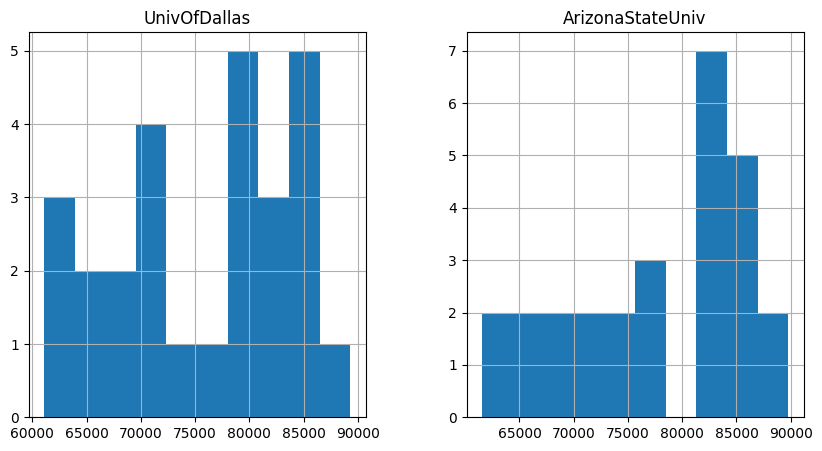

In [29]:
df_MW.hist(figsize=[10, 5])

- can't perform a t-test on these two columns because not-normally distrubuted and there's not much commonality between them

In [30]:
mw_alpha = 0.05
u_stat, mw_p_value = sts.mannwhitneyu(df_MW['UnivOfDallas'], df_MW['ArizonaStateUniv'], alternative="two-sided")

stat_eval(mw_p_value, mw_alpha)


Fail to reject (accept) the null hypothesis


Based on our sample and statistical analysis, we fail to reject the null hypothesis, which means that there is no significant difference between the salaries of the university's post graduates.